<img src="img/Python-logo-notext.svg" style="float: left; margin: 20px; height: 55px">

# <p style="color:darkorange">Airplane Crashes 1908-2009 EDA</p>  

_Authors: Jamal, Murad, Jubran, Azeem_

---




# Table of Contents


1. [Introduction](#introduction)
2. [Installation](#installation)
3. [Importing](#importing)
4. [Exploration](#exploration)
5. [Cleaning](#cleaning)
6. [Creating Columns](#creating-columns)
7. [Q&A and Visualizations](#qa-with-visualizations)
8. [Conclusion](#conclusion)
9. [Interesting Fact](#interesting-fact)


<a id ='Introduction'> </a>

# <p style="color:lightblue">Introduction</p>
---

#### <p style="color:gold">This EDA is about International Airplane crashes that have occured from 1908-2009</p>  

##### <p style="color:teal">Dataset Source: [Airplane Crashes 1908-2009](https://www.kaggle.com/datasets/saurograndi/airplane-crashes-since-1908?resource=download)</p>

This project was conducted by the Python Brothers during a Data Anlytics course by General Assembly Midde East in Bahrain. This project started on the 20<sup>th</sup> of February 2023 and was presented on 1<sup>st</sup> of March 2022. This project was to assess the skills and ability to work in a team and use Python to clean, analyse and visualise a dataset. The data set was acquire from online sources as detailed below, was select by the team members and approved by the instructors. 

At the time this Dataset was created in Kaggle (2016-09-09), the original version was hosted by [Open Data by Socrata](https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq), but unfortunately that is not available anymore. The dataset contains data of airplane accidents involving civil, commercial and military transport worldwide from 1908-09-17 to 2009-06-08.

<!-- <p align = "center"> -->
<img src="img/leio-mclaren-FwdZYz0yc9g-unsplash.jpg" style="float:right; margin: 20px; height: 250px">

### This dataset includes:

- All civil and commercial aviation accidents of scheduled and non-scheduled passenger airliners worldwide, which resulted in a fatality (including all U.S. Part 121 and Part 135 fatal accidents)
- All cargo, positioning, ferry and test flight fatal accidents.
- All military transport accidents with 10 or more fatalities.
- All commercial and military helicopter accidents with greater than 10 fatalities.
- All civil and military airship accidents involving fatalities.
- Aviation accidents involving the death of famous people.
- Aviation accidents or incidents of noteworthy interest.


The above mentioned dataset was very detailed and extensive which helped us to analyse it in many different ways. the following questions were prepared considering the available data and the calculated fields. 

<ol>
<li>Which crashes had the lowest survival rate with the highest Fatalities?</li>
<li>How many crashes involve Bahrain?</li>
<li>Which operators have the highest number of Fatalities?</li>
<li>Which operators have the highest number of crashes?</li>
<li>Which Operator Types had the most crashes?</li>
<li>Which crash had the highest total fatalities?</li>
<li>Percentage of military aircrafts that crashed during 1908-1945 out of all military plane crashes.</li>
<li>Total deaths due to airplane crashes by year.</li>
<li>How many plane crashes in each year?</li>
<li>How many crashes for each plane type?</li>
</ol>

## Data Dictionary:-  

|Column Name|Description|
|-----------|-----------|
|Date | The date of the plane crash |
|Time | The time that the plane crash occured |
|Location | Location of the crash |  
|Operator | The entity that owns or operates the plane |  
|Flight # | The flight number | 
|Route | The route taken by the aircraft/plane |
|Type | Aircraft Model |  
|Registration | Aircraft Registration number |
|cn/ln | Aircraft Serial Number |
|Aboard | Number of passengers |
|Fatalities | Number of passengers/people who boarded the plane who died due to the crash |
|Ground | Number of people who died and were not in the aircraft.(Collateral Damage) |

## New Columns:  
|Column Name|Description|
|-----------|-----------|
|Year | The year that the aircraft crashed. |
|Survival Rate |  Number of surviving passengers over the total number of passengers |
|Survived | Number of passengers that survived | 
|Operator_Type | Classifying "Operators" into two groups ("Military" which includes (Navy,Air Force,Military))("Non-Military which includes (Private,Medical,Cargo,Commercial)) |
|Country | The country which the aircraft crashed in. | 
|Continent | The continent which the aircraft crashed in. |



<a id='Installation'></a>

### <p style="color:gold">Installation</p>
---

In [1]:
#Installing libraries:-
#pip install pandas
#pip install plotly
#pip install statsmodels
#pip install seaborn
#pip install matplotlib
#pip install regex

<a id='Importing'></a>

### <p style="color:gold">Importing:-</p>

In [2]:
#Importing libraries for analysis and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels as sm
import seaborn as sns
import re

In [3]:
airplane_crashes = pd.read_csv("data/Airplane_Crashes_and_Fatalities_Since_1908.csv")
continent_country=pd.read_csv('data/country_continent.csv',names=['Continent','Entity'])

<a id='Exploration'></a>
### <p style="color:gold">Exploration</p>
---

In [4]:
airplane_crashes.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [5]:
airplane_crashes.tail()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,06/08/2009,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


In [6]:
airplane_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


<p style="color:darkseagreen">Exploring nulls further for the "Flight #" column</p>

In [7]:
print(round((airplane_crashes["Flight #"].isnull().sum()/airplane_crashes.shape[0])*100,2),'%')

79.71 %


<p style="color:darkseagreen">Reviewing Summary Statistics for numerical variables in the DataFrame.</p>

In [8]:
airplane_crashes.describe()  #Boxplot graphs and histograms

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [9]:
#Scatter Matrix - To examine the relationship between Aboard , Fatalities , Ground
fig_scat_matrix=px.scatter_matrix(airplane_crashes[['Aboard','Fatalities','Ground']])
fig_scat_matrix.show()

In [10]:
#Correlation Table to support our scatter plot matrix
airplane_crashes[['Aboard','Fatalities','Ground']].corr()

,Aboard,Fatalities,Ground
Aboard,1.000000,0.757172,0.023241
Fatalities,0.757172,1.000000,0.035170
Ground,0.023241,0.035170,1.000000


<p style="color:darkseagreen">A correlation matrix using multiple graphs showing the relationships between total number of passengers, number of dead passengers, and number of ground casualties. We can deduce that ground casualties are a rare occurence</p>

In [11]:
# Distplot - To examine the disterbution of the numerical varibles: Aboard , Fatalities , Ground
fig_hist_box = px.histogram(airplane_crashes, x=['Aboard','Fatalities','Ground'],
                   marginal="box")
fig_hist_box.show()

<p style="color:darkseagreen">The data is extremely skewed  for the above variables due to extreme outliers, For the 'Ground" variable the interquartile range  is non-existent as all values in the IQR are the same (equal to 0). A high standard deviation for the three variables show that they have a wide spread of values. Since the mean and median are not equal and far apart(not a symmetric distribution) and due to the skewed data we should use the median as a true average instead of the mean.</p>

<a id='Cleaning'></a>

### <p style="color:gold">Cleaning</p>
---

<p style="color:darkseagreen">Converting "Date" column from object Dtype to datetime64[ns] Dtype</p>

In [12]:
airplane_crashes["Date"] = pd.to_datetime(airplane_crashes.Date)

<p style="color:darkseagreen">Assuming that "Date" is not chronologically ordered, we sorted the DataFrame by ascending "Date" and reseted the index and dropped/removed the old index.</p>

In [13]:
airplane_crashes.sort_values(by='Date',ascending=True,inplace=True)
airplane_crashes.reset_index(drop=True,inplace=True)

<p style="color:darkseagreen">Removing "Flight #" column as it is not necessary for the analysis and the number of nulls in the column is around 80% of the data in the column.</p>

In [14]:
airplane_crashes.drop("Flight #",axis = 1, inplace = True)

<p style="color:darkseagreen">Replace null value with empty string to avoid "AttributeError: 'float' object has no attribute" error, to help us later on with extracting the Country from the location</p>

In [15]:
airplane_crashes['Location'].fillna('',inplace=True)

C:\Users\jamal\AppData\Local\Temp\ipykernel_6160\3339366205.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [16]:
# Table preview
airplane_crashes.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


<a id='Creating Columns'></a>

### <p style="color:gold">Creating Columns</p>
---

In [17]:
 # Creating the column "Year" by extracting it from the column "Date".
airplane_crashes["Year"] = airplane_crashes.Date.dt.year

In [18]:
# Creating the column "Survivied" by subtracting the number of dead passengers from total number of passengers.
airplane_crashes['Survived'] = airplane_crashes.Aboard - airplane_crashes.Fatalities        

In [19]:
# Creating the column "Total_Fatalities" by adding the "Fatalities" and the "Ground" columns.
airplane_crashes["Total_Fatalities"] = airplane_crashes["Fatalities"] + airplane_crashes["Ground"]

In [20]:
# Creating the column "Survival_Rate" by subtracting the number of dead passengers from total number of passengers and dividing the result by the number of passengers.
airplane_crashes["Survival_Rate"] = (airplane_crashes["Aboard"] - airplane_crashes["Fatalities"])/airplane_crashes["Aboard"]

<p style="color:indianred">Categorized operator with military branche names as military type and other types as non military</p>

In [21]:
def categorise_operator(operator):
    '''
        categorise_operator(operator) -> Military/None-Military (str) --[Beta]

        Checks for keywords in 'operator' to diffrenciate if the the operator is
        under the military branch.
    '''
    if type(operator)==float:
        return operator
    military_branches=['military','navy','air force']
    for x in military_branches:
        if x in operator.lower():
            return 'Military'
        
    return 'Non-Military'

airplane_crashes['Operator_Type']=airplane_crashes['Operator'].apply(categorise_operator)

<p style="color:indianred">Creating the "Country" by extracting country names from the strings in the "Location" column and adjusting misspelled names.</p>

In [22]:
#from textblob import TextBlob
def extract_country(location):
    '''
        extract_country(location) -> Country Name (str)

        The function wrangles the location and extracts the name of the country.
    '''
        
    #Country name located at the end of the string and the majority of the location are seperated by ','
    country=location.split(',')
    
    #NOTE: TextBlob did not help in cleaning process of this section -_- It only made it worse
    #txtb=TextBlob(country[-1])
    #country[-1]=str(txtb.correct())

    country[-1]=country[-1].replace('Off ','').replace('off ','').replace('Democrati','Democratic').replace('Democtrati','Democratic'\
                ).replace('Republi','Republic').replace('Republicc','Republic').replace('Republicof','Republic of').replace('Atlanti','Atlantic'\
                ).replace('Atlanticc','Atlantic').replace('Pacifi','Pacific').replace('Balti','Baltic').replace('The Netherlands','Netherlands'\
                ).replace('Kazakastan','Kazakhstan').replace('Boliva','Bolivia').replace('Afghanstan','Afghanistan').replace('Kazakastan','Kazakhstan'\
                ).replace('Djbouti','Djibouti').replace('Morroco','Morocco').replace('Cogo','Congo').replace('Sierre','Sierra').replace('Airzona','Arizona'\
                ).replace('Domincan','Dominican').replace('Morrocco','Morocco').replace('Aregntina','Argentina').replace('Inodnesia','Indonesia'\
                ).replace('Bulgeria','Bulgaria').replace('Kasakastan','Kazakhstan').replace('Ilinois','Illinois').replace('Hati','Hatti'\
                ).replace('Manmar','Myanmar').replace('Yugosalvia','Yugoslavia').replace('Baangladesh','Bangladesh').replace('Louisana','Louisiana'\
                ).replace('Romainia','Romania').replace('Deleware','Delaware').replace('Massachutes','Massachusetts').replace('Equitorial','Equatorial'\
                ).replace('Arazona','Arizona').replace('Dekota','Dakota').replace('Oklohoma','Oklahoma').replace('Coloado','Colorado'\
                ).replace('Mocambique','Mozambique').replace('Cailifornia','California').replace('Alakska','Alaska'\
                ).replace('Belgium Congo','Democratic Republic of Congo').replace('DR Congo','Democratic Republic of Congo').replace('Democratic Republic Congo','Democratic Republic of Congo'\
                ).replace('Yamen','Yemen').replace('Newfoundland','Canada').replace('Minnisota','Minnesota').replace('Algiers','Algeria').replace('Wisconson','Wisconsin')

    #Separate joint words
    for x in re.findall('.([A-Z]).',country[-1]):
        country[-1]=country[-1].replace(x,' '+x)

    #Classify States under USA 
    #Hurdle: Confusion between Georgia (State) and Georgia (Country)
    US_STATES=['PR', 'NH', 'New Jersey', 'North Dakota', 'MD', 'Rhode Island', 'VI', 'MP', 'OR', 'TX', 'Alabama', 'New York', 'D.C.', 'CA', 'AZ', 'Alaska',\
                'Florida', 'FL', 'New  York', 'Ohio', 'Hawaii', 'UT', 'SC', 'LA', 'New  Jersey', 'Connecticut', 'NJ', 'Mississippi', 'Massachusetts', 'TT',\
                 'NY','Trust Territories', 'ND', 'IN', 'WA', 'VT', 'New Mexico', 'Northern Mariana Islands', 'Indiana', 'DC', 'Colorado', 'NC', 'Arizona',\
                 'American Samoa', 'ID', 'Michigan', 'RI', 'Texas', 'Illinois', 'ME', 'WI', 'WY', 'Puerto Rico', 'Wisconsin', 'VA', 'AS', 'Kentucky', 'AR',\
                  'SD', 'Virginia', 'MI', 'MO', 'MA', 'Tennessee', 'Washington', 'AL', 'Guam', 'IL', 'Arkansas', 'Iowa', 'South Carolina', 'New Hampshire',\
                   'GA', 'Pennsylvania', 'AK', 'TN', 'Us Virgin Islands', 'WV', 'MS', 'District Of Columbia', 'Maryland', 'Delaware', 'MT', 'OK', 'CO', 'U. S. Samoa',\
                    'CT', 'NV', 'KY', 'MN', 'IA', 'United States', 'Louisiana', 'KS', 'Wyoming', 'Kansas', 'HI', 'Virgin Islands', 'DE', 'PA', 'NE', 'Minnesota',\
                     'Nebraska', 'West Virginia', 'GU', 'OH', 'NM', 'Montana', 'Maine', 'Georgia', 'Vermont', 'Oklahoma', 'Utah', 'South Dakota', 'Idaho', 'Oregon',\
                      'California', 'Missouri', 'Nevada', 'North Carolina']
    
    country[-1]=country[-1].replace('  ',' ')
    for state in US_STATES:
        if state in country[-1]:
            return 'United States'
    #Display the current country that was then under USSR    
    if 'ussr' in country[-1].lower():
        return country[-2]
    #Assign Russia to Soviet Union and Moscow 
    elif 'Soviet Union' in country[-1] or 'Moscow' in country[-1]:
        return 'Russia'
    #Extract country inbetween perenthsis
    elif '(' in country[-1]:
        return re.findall('\( ([A-Za-z]*)',country[-1])[0]
    #Assigning UK to United Kingdom
    elif 'UK' in country[-1] or 'London' in country[-1] or 'England' in country[-1]:
        return 'United Kingdom'
    #UAR refers to Eqypt
    elif 'UAR' in country[-1]:
        return 'Egypt'
    elif 'UAE' in country[-1]:
        return 'United Arab Emirates'
    elif 'English Channel' in country[-1]:
        return 'English Channel'
    elif 'Mediterranean' in country[-1]:
        return 'Mediterranean Sea'
    #Dealing with some countries that were not seperated by ','
    for c in ['Indian Ocean','Pacific Ocean','Atlantic Ocean','Denmark','Australia','Germany','Malta','France','Cuba','Brazil','Vietnam','India','Iraq','Greece','Bermuda','Yemen','Samoa','Canada','Colombia']:
        if c in country[-1]:
            return c
    # if non of the conditions met then return the country name
    return country[-1]

<>:58: SyntaxWarning:

invalid escape sequence '\('

<>:58: SyntaxWarning:

invalid escape sequence '\('

C:\Users\jamal\AppData\Local\Temp\ipykernel_6160\3200846286.py:58: SyntaxWarning:

invalid escape sequence '\('



In [23]:

airplane_crashes['Country']=airplane_crashes['Location'].apply(extract_country)
airplane_crashes['Country']=airplane_crashes['Country'].apply(lambda x: x.lstrip())

In [24]:
# Table preview
airplane_crashes.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived,Total_Fatalities,Survival_Rate,Operator_Type,Country
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0,1.0,0.5,Military,United States
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0,5.0,0.0,Military,United States
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,0.0,1.0,0.0,Non-Military,Canada
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,6.0,14.0,0.3,Military,Over the North Sea
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,0.0,30.0,0.0,Military,Germany


<p style="color:darkseagreen">Merging Continent-Country dataframe with the existing dataframe</p>

In [25]:
# From edited Covid Dataset
continent_country.drop(index=[0],axis=0,inplace=True)

# Dataframe preview
continent_country.head()

,Continent,Entity
1,Asia,Afghanistan
2,Europe,Albania
3,Africa,Algeria
4,Europe,Andorra
5,Africa,Angola


In [26]:
# Merge main dataset with continent_country dataset
merged_df=airplane_crashes.merge(continent_country,how='left',left_on='Country',right_on='Entity')

In [27]:
def fill_missing_continent(country):
    '''
        fill_missing_continent(country) -> Continent Name or Sea/Ocean (str) --[Beta version]

        Fills missing continents 
    '''
    if type(country[1])!=float:
        return country[1]          
    CONTI_KEY={'Ocean/Sea':['Sea','Ocean','Channel'],
               'Africa':['Djibouti','Tanganyika','Comoros Islands','Congo','São Tomé Island','French West Africa'],
               'Asia':['Tonkin','Timor','Oman','Burma','Napal','Netherlands Indies'],
               'Oceania':['New Guinea'],
               'Europe':['Gibraltar','Amsterdam','Karkov','Bosnia- Herzegovina','Chechnya','Finland','Czechoslovakia','Macedonia','Scotland','Yugoslavia'],
               'South America':['Sao Gabriel de Cachoeria','Buenos Aires','Trinidad'],
               'North America':['West Indies','Manitoba','Saskatchewan','Turks & Caicos Islands']}
    for key,words in CONTI_KEY.items():
        for word in words:
            if word in country[0]:
                return key

In [28]:
merged_df['Continent']=merged_df[['Country','Continent']].apply(fill_missing_continent,axis=1)

C:\Users\jamal\AppData\Local\Temp\ipykernel_6160\3293049070.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\jamal\AppData\Local\Temp\ipykernel_6160\3293049070.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\jamal\AppData\Local\Temp\ipykernel_6160\3293049070.py:18: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [29]:
merged_df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived,Total_Fatalities,Survival_Rate,Operator_Type,Country,Continent,Entity
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0,1.0,0.5,Military,United States,North America,United States
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0,5.0,0.0,Military,United States,North America,United States
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,0.0,1.0,0.0,Non-Military,Canada,North America,Canada
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,6.0,14.0,0.3,Military,Over the North Sea,Ocean/Sea,NaN
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,0.0,30.0,0.0,Military,Germany,Europe,Germany


<a id='Q&A with Visualizations'></a>

### <p style="color:gold"> Q&A with Visualizations</p>
---

In [30]:

num_crash_year=merged_df.groupby(['Year','Continent','Country']).aggregate(num_crash=pd.NamedAgg('Date',np.count_nonzero),sum_survival=\
                                                                           pd.NamedAgg('Survived',np.sum),sum_fatal=pd.NamedAgg('Fatalities',np.sum),\
                                                                           sum_tot_fatal=pd.NamedAgg('Total_Fatalities',np.sum)\
                                                                           ).reset_index().rename(columns={'num_crash':'Number of Crashes',\
                                                                                                           'sum_survival':'Year Survival',\
                                                                                                            'sum_fatal':'Year Fatalities',\
                                                                                                                'sum_tot_fatal':'Year Total Fatalities'}\
                                                                                                                    ).sort_values("Year",ascending = True)
num_crash_year.head()

C:\Users\jamal\AppData\Local\Temp\ipykernel_6160\2104832488.py:1: FutureWarning:

The provided callable <function sum at 0x000002B1198EA8E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,Year,Continent,Country,Number of Crashes,Year Survival,Year Fatalities,Year Total Fatalities
0,1908,North America,United States,1,1.0,1.0,1.0
1,1912,North America,United States,1,0.0,5.0,5.0
2,1913,Europe,Germany,1,0.0,30.0,30.0
3,1913,North America,Canada,1,0.0,1.0,1.0
4,1913,Ocean/Sea,Over the North Sea,1,6.0,14.0,14.0


<p style="color:turquoise">Which crashes had the lowest survival rate with the highest Fatalities?</p>

In [31]:
# Filtering crashes to find out the ones with the lowest survival rate and sorted by highest Fatalities.
airplane_crashes[['Date','Location','Operator','Type','Aboard','Survived','Fatalities','Ground','Total_Fatalities','Survival_Rate']]\
    [airplane_crashes.Survival_Rate == airplane_crashes.Survival_Rate.min()].sort_values(by='Total_Fatalities',ascending=False).head(10)   

,Date,Location,Operator,Type,Aboard,Survived,Fatalities,Ground,Total_Fatalities,Survival_Rate
4803,2001-09-11,"New York City, New York",American Airlines,Boeing 767-223ER,92.0,0.0,92.0,2750.0,2842.0,0.0
4804,2001-09-11,"New York City, New York",United Air Lines,Boeing B-767-222,65.0,0.0,65.0,2750.0,2815.0,0.0
4454,1996-11-12,"Near Charkhidadri, India",Saudi Arabian Airlines / Kazastan Airlines,Boeing B-747-168B / Ilyushin IL-76TD,349.0,0.0,349.0,0.0,349.0,0.0
2722,1974-03-03,"Near Ermenonville, France",Turkish Airlines (THY),McDonnell Douglas DC-10-10,346.0,0.0,346.0,0.0,346.0,0.0
3556,1985-06-23,"AtlantiOcean, 110 miles West of Ireland",Air India,Boeing B-747-237B,329.0,0.0,329.0,0.0,329.0,0.0
3235,1980-08-19,"Near Riyadh, Saudi Arabia",Saudi Arabian Airlines,Lockheed 1011-200 TriStar,301.0,0.0,301.0,0.0,301.0,0.0
3769,1988-07-03,"Over the Persian Gulf, near Bandar Abbas, Iran",Iran Air,Airbus A300B2-203,290.0,0.0,290.0,0.0,290.0,0.0
4915,2003-02-19,"Near Shahdad, Iran",Military - IslamiRevolution's Guards Corps,Ilyushin Il-76MD,275.0,0.0,275.0,0.0,275.0,0.0
3136,1979-05-25,"Chicago O'Hare, Illinois",American Airlines,McDonnell Douglas DC-10-10,271.0,0.0,271.0,2.0,273.0,0.0
3814,1988-12-21,"Lockerbie, Scotland",Pan American World Airways,Boeing B-747-121A,259.0,0.0,259.0,11.0,270.0,0.0


<p style="color:seagreen">Unfortunately there were many plane crashes with a 0 survival rate</p>

<p style="color:turquoise">How many crashes involve Bahrain?</p>

In [32]:
#Filtering the DataFrame for crashes in involving the country (Bahrain).
airplane_crashes[airplane_crashes["Country"] == "Bahrain"]   

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived,Total_Fatalities,Survival_Rate,Operator_Type,Country
1062,1950-06-12,21:52,Off Bahrain,Air France,Saigon - Paris,Douglas DC-4-1009,F-BBDE,42937,52.0,46.0,0.0,"While making a final approach for Bahrain, the...",1950,6.0,46.0,0.115385,Non-Military,Bahrain
1063,1950-06-14,21:55,Off Bahrain,Air France,Saigon - Paris,Douglas DC-4-1009,F-BBDM,42990,53.0,40.0,0.0,The aircraft crashed into the Persian Gulf whi...,1950,13.0,40.0,0.245283,Non-Military,Bahrain
4739,2000-08-23,19:30,"Off Manama, Bahrain",Gulf Air,Cairo - Manama,Airbus A320-212,A4O-EK,0481,143.0,143.0,0.0,The aircraft crashed into the Persian Gulf and...,2000,0.0,143.0,0.000000,Non-Military,Bahrain


<p style="color:turquoise">Which operators have the highest number of Fatalities?</p>

In [33]:
# Counting the total number of dead passengers for each Operator and then sorting the top 10 operators with the highest fatalities.
df_death_airline = airplane_crashes.groupby('Operator').Fatalities.sum().sort_values(ascending = False)
df_death_airline_top10 = df_death_airline.head(10)
df_death_airline_top10

Operator
Aeroflot                           7156.0
Military - U.S. Air Force          3717.0
Air France                         1734.0
American Airlines                  1421.0
Pan American World Airways         1302.0
Military - U.S. Army Air Forces    1070.0
United Air Lines                   1021.0
AVIANCA                             941.0
Turkish Airlines (THY)              891.0
Indian Airlines                     863.0
Name: Fatalities, dtype: float64

C:\Users\jamal\AppData\Local\Temp\ipykernel_6160\1241976610.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




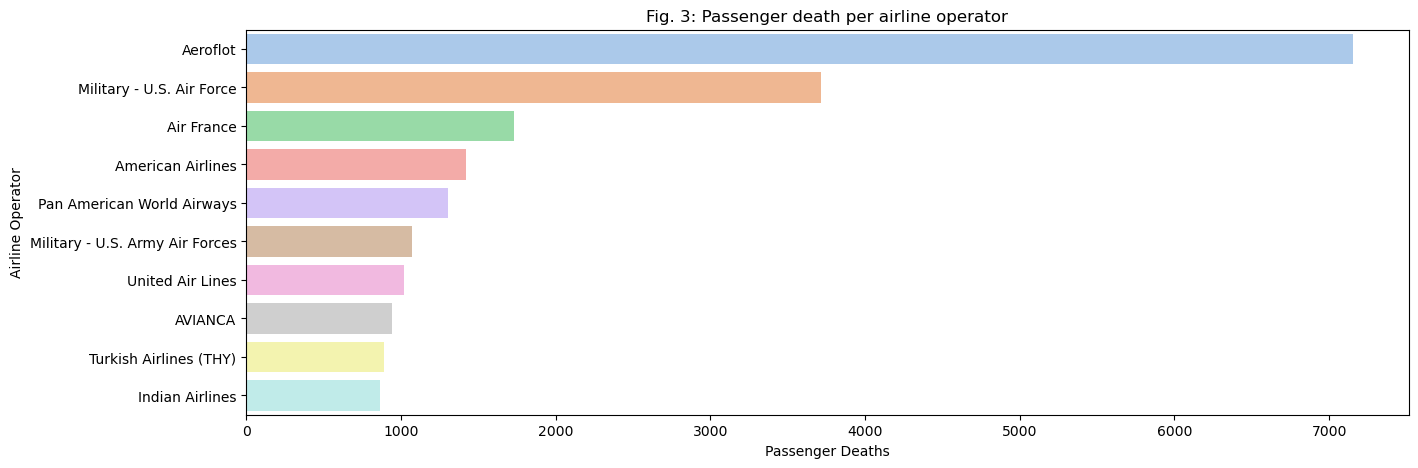

In [34]:
plt.figure(figsize=(15, 5))
sns.barplot(y=df_death_airline_top10.index,x = df_death_airline_top10.values, palette="pastel")
plt.xlabel('Passenger Deaths')
plt.ylabel('Airline Operator')
plt.title('Fig. 3: Passenger death per airline operator')
plt.show()

<p style="color:seagreen"> Seems like Aeroflot operated aircrafts cause the highest number of passenger fatalities</p>

<p style="color:turquoise">Which operators have the highest number of crashes?</p>

In [35]:
# Counting the number of crashes connected to each Operator
airplane_crashes.Operator.value_counts().head(10) 

Operator
Aeroflot                               179
Military - U.S. Air Force              176
Air France                              70
Deutsche Lufthansa                      65
Air Taxi                                44
United Air Lines                        44
China National Aviation Corporation     44
Military - U.S. Army Air Forces         43
Pan American World Airways              41
Military - U.S. Navy                    36
Name: count, dtype: int64

<p style="color:turquoise">Which Operator Types had the most crashes?</p>

In [36]:
# Counting the number of crashes that are in each category.
airplane_crashes["Operator_Type"].value_counts() 

Operator_Type
Non-Military    4460
Military         790
Name: count, dtype: int64

<p style="color:seagreen">Military Operated Aircrafts are less than Non-Military Aircrafts because Non Military Aircrafts consists of several different operators.</p>

<p style="color:turquoise">Which crash had the highest total fatalities?</p>

In [37]:
# Sorting airplane crashes by highest total_fatalities and then calling the row with the highest fatality
airplane_crashes.sort_values(by='Total_Fatalities',ascending = False).head(2)
                                                  

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived,Total_Fatalities,Survival_Rate,Operator_Type,Country
4803,2001-09-11,08:47,"New York City, New York",American Airlines,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,92.0,92.0,2750.0,The aircraft was hijacked shortly after it lef...,2001,0.0,2842.0,0.0,Non-Military,United States
4804,2001-09-11,09:03,"New York City, New York",United Air Lines,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,65.0,65.0,2750.0,The aircraft was hijacked shortly after it lef...,2001,0.0,2815.0,0.0,Non-Military,United States


<p style="color:seagreen">After filtering, we noticed that the two crashes with the highest total fatalities occured on the same day and were connected. Furthermore we noticed that these two crashes share the same ground fatalities

<p style="color:turquoise">Percentage of military aircrafts that crashed during 1908-1945 out of all military plane crashes.</p>

In [38]:
# Dividing the (number of military aircrafts that crashed during and before the year 1945) by the total number of military aircraft crashes.
print(round((airplane_crashes[(airplane_crashes["Operator_Type"] == "Military") & (airplane_crashes["Year"]  <= 1945)].shape[0])/(airplane_crashes[(airplane_crashes["Operator_Type"] == "Military")].shape[0]) * 100,2),'%')


15.32 %


<p style="color:seagreen">Only 15.32 % of Military Aircrafts crashes happened during 1908-1945 (World War I and World War II occured during this time period)</>

<p style="color:turquoise">Total deaths due to airplane crashes by year</p>

In [39]:
fig_fatalities_year = px.bar(num_crash_year, x="Year", y="Year Total Fatalities", title='Total plane related deaths by year')
fig_fatalities_year.show()

<p style="color:seagreen">The year 2001 seems to have the highest number of deaths by a large margin

<p style="color:turquoise">How many plane crashes in each year?</p>

In [40]:
crash_by_year=merged_df.Year.value_counts().sort_index()

In [41]:
fig_num_crash_year = px.line(x=crash_by_year.index, y=crash_by_year.values, title='Number of crashes by year',markers=True)
fig_num_crash_year.show()

<p style="color:seagreen">There was an upward trend of crashes from 1940 to 1972. Possible reasons might be an increase in the number of flights and aircrafts with less strict guidelines and wars, afterwards there was a downward trend.(could be that airlines adhered to stricter guidelines.)</p>

<p style="color:turquoise">How many crashes for each plane type?</p>

In [42]:
type_cont_count_crash=merged_df.groupby(['Operator','Type','Continent','Country']).aggregate(num_crash=pd.NamedAgg('Date',np.count_nonzero)\
                                                                           ).reset_index().rename(columns={'num_crash':'Number of Crashes'}\
                                                                                                  ).sort_values(by='Number of Crashes',ascending=False).head(20)
type_cont_count_crash.head()

,Operator,Type,Continent,Country,Number of Crashes
4246,US Aerial Mail Service,De Havilland DH-4,North America,United States,26
1332,China National Aviation Corporation,Douglas C-47,Asia,China,13
2818,Military - U.S. Air Force,Boeing KC-135A,North America,United States,10
2894,Military - U.S. Air Force,Lockheed C-130E Hercules,North America,United States,9
173,Aeroflot,Tupolev TU-104B,Europe,Russia,9


In [43]:
fig = px.treemap(type_cont_count_crash, path=['Type', 'Continent' ,'Country'], values='Number of Crashes',
                  color='Continent', hover_data=['Operator'],color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(type_cont_count_crash['Number of Crashes'], weights=type_cont_count_crash['Number of Crashes']),
                  title="Number of Crashes by Plane Type & Country")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_traces(root_color="darkgrey")
fig.show()

<p style="color:indianred">A visual showing the number of crashes that occured in every continent-country by plane type. The Size of the box indicates the proportion of the occurance of the crashes amongst the total crashes. Clicking on the Plane Type, Continent or Country will show indepth outlook and hovering over them will provide with details to Number of crashes and Operators. A glimps into the visual, 'Douglas DC-3' had the most crashes (35 planes) and 'US Aerial Mail Services' is the operator witht he most crashes (26 time) via the second plane type 'De Havilland DH-4' with (26 crashes).

In [44]:

fig_fatal_crash_yr = px.scatter(num_crash_year, x='Year',y='Number of Crashes',title='Total Fatalities by the number of crashes over the years',color="Continent",\
                 size='Year Total Fatalities')

fig_fatal_crash_yr.show()

<p style="color:indianred">A visual showing the number of crashes that occured in every continent with the size of the bubble increasing as the number of fatalities gets higher over the time period of the dataset. An obvious pattern we can extrapolate from the visual is that the highest number of crashes happen in North America which can also lead to the highest number of fatalities

<a id='Conclusion'></a>

### <p style="color:gold">Conclusion</p>
---

The analysis indicates that the majority of the crashes happened within North America and practically involving US plane operators. One of the major outliers in this analysis is the September 11, 2001 incident which featured one of the most devastating mass fatalities due to terrorism while Aeroflot, one of the oldest Russian airlines has been involved in the highest number of passenger fatalities. Collateral damage (fatalities on the ground) is rare but devastating in terms of number of casualties.  
Expanding the scope of the analysis by venturing into :  
1. The number of active operators by year?
2. Operator: Successful flights/Crashed Flights by year?
3. With extensive analysis on the 'Summary'  to derive the Top reason for Plane crashes?
4. Worst plane to travel on (based on: reason for crash due to technical issues)
5. Further expand the None Military  (to Private, Taxi, Passenger ,Cargo,etc...) for more detailed analysis

<a id='Interesting Fact'></a>

### <p style="color:lightblue">Interesting Fact</p>
---

<p style="color:gold">The Disappearance of Amelia Earhart</p>

In [47]:
print(merged_df[["Date","Year","Summary"]][merged_df["Year"] == 1937].loc[435]["Summary"])

The plane disappeared while en route from  Lae to Howland Island. The aircraft had to be flown higher than expected due to storms which used extra fuel.  In addition, strong head winds were encountered.  The aircraft most likely ran out of fuel and ditched into the ocean 50 to 100 miles northwest of Howland Island. Amelia Earhart, 40, and navigator Fred Noonan, killed.
